> # Imports

In [1]:
#my modules
import acquire as ac
import prepare as pp
import explore as exp
import matplotlib.pyplot as plt

#standard
import pandas as pd
import numpy as np
import re

#scraping
import requests
from requests import get
from bs4 import BeautifulSoup

#file
import os
import json
from typing import Dict, List, Optional, Union, cast


import nltk
from nltk.probability import FreqDist

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

json file found and loaded
imports loaded successfully, awaiting commands...


## Acquire

In [2]:
#get the data
click_data = ac.button_click()
click_data

json file found and loaded


,string
0,sindresorhus / awesome
1,vinta / awesome-python
2,awesome-selfhosted / awesome-selfhosted
3,avelino / awesome-go
4,trimstray / the-book-of-secret-knowledge
...,...
735,hetznercloud / awesome-hcloud
736,chinaBerg / awesome-canvas
737,RichardLitt / awesome-conferences
738,styfle / awesome-desktop-js


## Prepare

In [3]:
#no duplicated repos
click_data[click_data.duplicated()]

,string


In [4]:
#cleaned the data and changed from a df to a list!
ac.REPOS

['sindresorhus/awesome',
 'vinta/awesome-python',
 'awesome-selfhosted/awesome-selfhosted',
 'avelino/awesome-go',
 'trimstray/the-book-of-secret-knowledge',
 'papers-we-love/papers-we-love',
 '521xueweihan/HelloGitHub',
 'Hack-with-Github/Awesome-Hacking',
 'jaywcjlove/awesome-mac',
 'enaqx/awesome-react',
 'DopplerHQ/awesome-interview-questions',
 'MunGell/awesome-for-beginners',
 'sindresorhus/awesome-nodejs',
 'prakhar1989/awesome-courses',
 'Solido/awesome-flutter',
 'fffaraz/awesome-cpp',
 'wasabeef/awesome-android-ui',
 'binhnguyennus/awesome-scalability',
 'vsouza/awesome-ios',
 'tiimgreen/github-cheat-sheet',
 'dypsilon/frontend-dev-bookmarks',
 'akullpp/awesome-java',
 'brillout/awesome-react-components',
 'serhii-londar/open-source-mac-os-apps',
 'rust-unofficial/awesome-rust',
 'dkhamsing/open-source-ios-apps',
 'DovAmir/awesome-design-patterns',
 'ziadoz/awesome-php',
 'goabstract/Awesome-Design-Tools',
 'alebcay/awesome-shell',
 'herrbischoff/awesome-macos-command-line',


In [5]:
scraped = ac.get_scraped_data()

json file found and loaded


In [6]:
len(scraped)

740

In [7]:
#GOT THE DATA! Look at it...
scraped

,repo,language,readme_contents
0,sindresorhus/awesome,None,"<div align=""center"">\n\t<a href=""https://vshym..."
1,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...
2,awesome-selfhosted/awesome-selfhosted,Makefile,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
3,avelino/awesome-go,Go,"# Awesome Go\n\n<a href=""https://awesome-go.co..."
4,trimstray/the-book-of-secret-knowledge,None,"<p align=""center"">\n <a href=""https://github...."
...,...,...,...
735,hetznercloud/awesome-hcloud,None,# Awesome Hetzner Cloud\n\nA curated list of l...
736,chinaBerg/awesome-canvas,None,![](./assets/logo.png)\n## awesome-canvas\nLis...
737,RichardLitt/awesome-conferences,Ruby,# Awesome Conferences [![Awesome](https://cdn....
738,styfle/awesome-desktop-js,None,"<img width=""128"" height=""128"" src=""https://cd..."


In [8]:
#readme_contents looks like what I need.. but how many did I grab?
len(scraped)

740

In [9]:
#clean the readme
df = pp.clean_df(scraped, 'readme_contents')
df

,repo,language,readme_contents,clean,lemma
0,sindresorhus/awesome,None,"<div align=""center"">\n\t<a href=""https://vshym...",div align center href https vshymanskyy standw...,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...,awesome python awesome https cdn rawgit sindre...,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,Makefile,# Awesome-Selfhosted\n\n[![Awesome](https://cd...,awesome selfhosted awesome https cdn jsdelivr ...,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,Go,"# Awesome Go\n\n<a href=""https://awesome-go.co...",awesome go href https awesome go img align rig...,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,None,"<p align=""center"">\n <a href=""https://github....",p align center href https trimstray book secre...,p align center href http trimstray book secret...
...,...,...,...,...,...
735,hetznercloud/awesome-hcloud,None,# Awesome Hetzner Cloud\n\nA curated list of l...,awesome hetzner cloud curated list libraries t...,awesome hetzner cloud curated list library too...
736,chinaBerg/awesome-canvas,None,![](./assets/logo.png)\n## awesome-canvas\nLis...,assets logo png awesome canvas list awesome ht...,asset logo png awesome canvas list awesome htm...
737,RichardLitt/awesome-conferences,Ruby,# Awesome Conferences [![Awesome](https://cdn....,awesome conferences awesome https cdn rawgit s...,awesome conference awesome http cdn rawgit sin...
738,styfle/awesome-desktop-js,None,"<img width=""128"" height=""128"" src=""https://cd...",img width height src https cdn jsdelivr net np...,img width height src http cdn jsdelivr net npm...


In [10]:
#assign langugages to keep
languages = ['Python', 'JavaScript', 'HTML', 'Shell', 'Java', 'Go']

#edit the languages but keep the data
df['language'] = df.apply(lambda row: row['language'] if row['language'] in languages else 'other', axis=1)
df.language.value_counts()

other         599
Python         40
JavaScript     36
HTML           25
Shell          19
Java           11
Go             10
Name: language, dtype: int64

## Explore

train, validate, test = 

In [11]:
#checking for nulls
df.isnull().sum()

repo               0
language           0
readme_contents    0
clean              0
lemma              0
dtype: int64

In [12]:
df.head()

,repo,language,readme_contents,clean,lemma
0,sindresorhus/awesome,other,"<div align=""center"">\n\t<a href=""https://vshym...",div align center href https vshymanskyy standw...,div align center href http vshymanskyy standwi...
1,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...,awesome python awesome https cdn rawgit sindre...,awesome python awesome http cdn rawgit sindres...
2,awesome-selfhosted/awesome-selfhosted,other,# Awesome-Selfhosted\n\n[![Awesome](https://cd...,awesome selfhosted awesome https cdn jsdelivr ...,awesome selfhosted awesome http cdn jsdelivr n...
3,avelino/awesome-go,Go,"# Awesome Go\n\n<a href=""https://awesome-go.co...",awesome go href https awesome go img align rig...,awesome go href http awesome go img align righ...
4,trimstray/the-book-of-secret-knowledge,other,"<p align=""center"">\n <a href=""https://github....",p align center href https trimstray book secre...,p align center href http trimstray book secret...


In [13]:
df.columns

Index(['repo', 'language', 'readme_contents', 'clean', 'lemma'], dtype='object')

In [14]:
letter_counts = []

# Iterate over the values in the column, count the letters, and append to the list
for value in df['lemma']:
    count = len(value)
    letter_counts.append(count)

# Assign the list or Series as a new column in the DataFrame
df['letter_count'] = letter_counts

# Display the updated DataFrame
print(df)


                                       repo language  \
0                      sindresorhus/awesome    other   
1                      vinta/awesome-python   Python   
2     awesome-selfhosted/awesome-selfhosted    other   
3                        avelino/awesome-go       Go   
4    trimstray/the-book-of-secret-knowledge    other   
..                                      ...      ...   
735             hetznercloud/awesome-hcloud    other   
736                chinaBerg/awesome-canvas    other   
737         RichardLitt/awesome-conferences    other   
738               styfle/awesome-desktop-js    other   
739                aitemr/awesome-git-hooks    Shell   

                                       readme_contents  \
0    <div align="center">\n\t<a href="https://vshym...   
1    # Awesome Python [![Awesome](https://cdn.rawgi...   
2    # Awesome-Selfhosted\n\n[![Awesome](https://cd...   
3    # Awesome Go\n\n<a href="https://awesome-go.co...   
4    <p align="center">\n  <a href="h

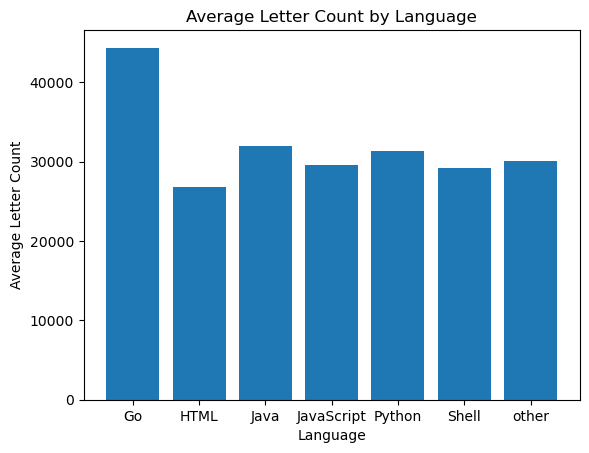

In [15]:
# Group by language and calculate the average letter count
grouped_data = df.groupby('language')['letter_count'].mean()

# Create a bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Language')
plt.ylabel('Average Letter Count')
plt.title('Average Letter Count by Language')
plt.show()

Are there any words that uniquely identify a programming language?

In [16]:
word_counts = exp.get_words(df)
word_counts

Unfiltered Data:187478 words  Filtered Data: 4000 words



,all,python,javascript,html,shell,java,go,other
http,216540,0,0,0,0,0,0,173261
img,22653,0,0,0,0,0,0,16739
code,14547,0,0,0,0,0,0,11630
awesome,13657,0,0,0,0,0,0,11485
source,12575,0,0,0,0,0,0,10793
...,...,...,...,...,...,...,...,...
reducing,76,0,0,0,0,0,0,55
ga,76,0,0,0,0,0,0,70
knife,76,0,0,0,0,0,0,66
indie,76,0,0,0,0,0,0,62


In [17]:
#proportion of languages
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1).round(2)
    labels.columns = ['n', 'percent']
    labels
    return labels

#added to explore.py

In [18]:
word_counts

,all,python,javascript,html,shell,java,go,other
http,216540,0,0,0,0,0,0,173261
img,22653,0,0,0,0,0,0,16739
code,14547,0,0,0,0,0,0,11630
awesome,13657,0,0,0,0,0,0,11485
source,12575,0,0,0,0,0,0,10793
...,...,...,...,...,...,...,...,...
reducing,76,0,0,0,0,0,0,55
ga,76,0,0,0,0,0,0,70
knife,76,0,0,0,0,0,0,66
indie,76,0,0,0,0,0,0,62


In [19]:
word_counts.head(0)

,all,python,javascript,html,shell,java,go,other


In [20]:
language_columns = [col for col in df.columns if col != 'all']

word_frequencies = {language: {} for language in language_columns}

for index, row in df.head(100).iterrows():
    for language in language_columns:
        word = row[language]       
        if pd.notnull(word):
            if word in word_frequencies[language]:
                word_frequencies[language][word] += 1
            else:
                word_frequencies[language][word] = 1
for language in language_columns:
    print(f"Word frequencies for {language}:")
    print(word_frequencies[language])
    print()